# Positive test sequences to training data - identity

In [1]:
# Retina quality plots
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd

BIN_THRESHOLDS = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

pos_to_pos_bins = [pd.read_parquet(f'../../data/train_test_alignments/Galson_2016_pos_{int(threshold * 100)}_identity.parquet') for threshold in BIN_THRESHOLDS]
pos_to_neg_bins = pd.read_parquet(f'../../data/train_test_alignments/Galson_2016_pos_to_neg_identity.parquet')

In [3]:
def pos_bins_size_matrix(pos_pos_bins=pos_to_pos_bins, pos_neg_bins=pos_to_neg_bins):
    """
    Converts positive-positive bins and positive-negative bins
    to a single "matrix-like" structure with corresponding sizes.
    """
    
    matrix_bins = []

    for binn in pos_to_pos_bins:
        pos_neg_bin = pos_neg_bins.loc[binn.index]
        inner_bins = [len(binn.loc[pos_neg_bin[pos_neg_bin['Bin'] == thr].index]) for thr in BIN_THRESHOLDS]
        matrix_bins.append(inner_bins)
    
    return matrix_bins

In [4]:
heatmap_size_bins = pos_bins_size_matrix()
heatmap_size_bins

[[14019, 13515, 5504, 954, 301, 662],
 [6993, 23562, 24189, 7682, 764, 1345],
 [2182, 9521, 24204, 17094, 2765, 1463],
 [3035, 5167, 7178, 8558, 2892, 687],
 [2597, 4543, 4282, 1891, 775, 159],
 [2951, 7088, 11732, 7288, 1115, 695]]

In [5]:
sum(sum(heatmap_size_bins,[])) 

229352

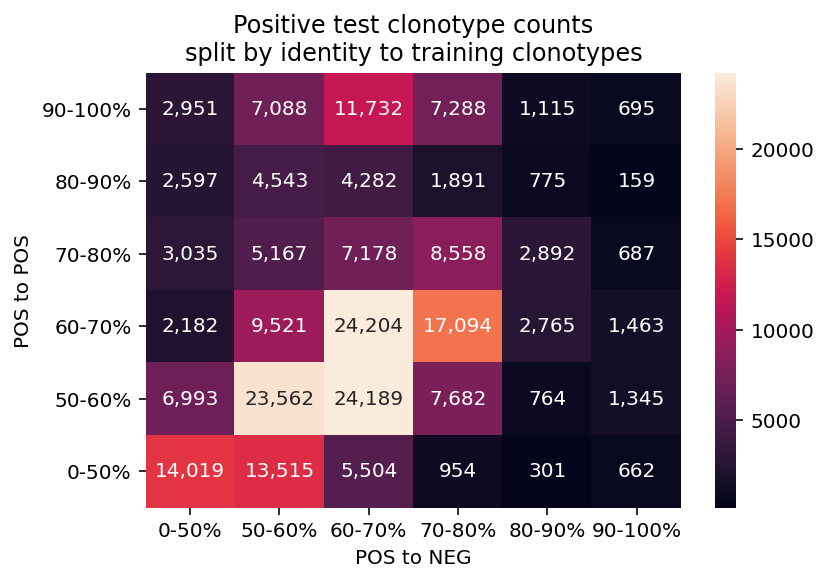

In [6]:
import seaborn as sns

tmp_thresholds = [0] + BIN_THRESHOLDS
PERC_BIN_THRESHOLDS = [
   f'{int(100 * tmp_thresholds[i-1])}-{int(100 * tmp_thresholds[i])}%' for i in range(1,len(tmp_thresholds))
]

ax = sns.heatmap(heatmap_size_bins[::-1], annot=True, fmt=',',
                 xticklabels=PERC_BIN_THRESHOLDS,
                 yticklabels=PERC_BIN_THRESHOLDS[::-1])
ax.set(xlabel='POS to NEG', ylabel='POS to POS', title=f'Positive test clonotype counts\nsplit by identity to training clonotypes');